In [1]:
import spacy
import networkx as nx
from spacy.cli import download

MODEL_NAME = "en_core_web_sm"
try:
    nlp = spacy.load(MODEL_NAME)
except OSError:
    print(f"Model '{MODEL_NAME}' not found. Downloading...")
    download(MODEL_NAME)
    nlp = spacy.load(MODEL_NAME)

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.text
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

print("Global Context Graph:")
for edge in global_context.graph.edges(data=True):
    print(f"{edge[0]} --{edge[2]['relation']}-> {edge[1]}")


Global Context Graph:
Alice --moves-> apple
Alice --exits-> kitchen
Bob --exits-> kitchen
Charlie --enters-> kitchen
Charlie --moves-> apple


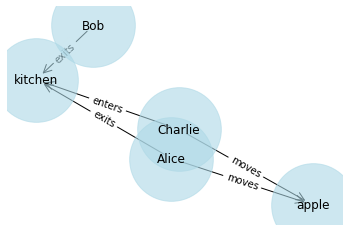

In [4]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.text
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        
        nx.draw_networkx_nodes(self.graph, pos, node_size=7000, node_color='lightblue', alpha=0.6)
        
        edge_labels = dict([((u, v,), d['relation'])
                            for u, v, d in self.graph.edges(data=True)])
        nx.draw_networkx_edges(self.graph, pos, arrowstyle='->', arrowsize=20)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        
        nx.draw_networkx_labels(self.graph, pos, font_size=12, font_family="sans-serif")
        
        plt.axis('off')
        plt.show()

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

global_context.draw_graph()


Resulting State Sentences:
Alice and Bob are in the kitchen.
The apple is in the basket.
The basket is in the kitchen.
Alice is in the apple
The fridge is in the kitchen.
Bob is not in the kitchen
Alice is not in the kitchen
Charlie is in the kitchen
Charlie is in the apple
The cupboard is in the kitchen.


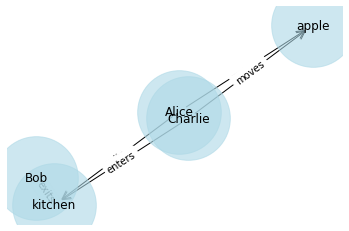

In [10]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the pre-trained English model
nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.text
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)  # positions for all nodes

        # Nodes
        nx.draw_networkx_nodes(self.graph, pos, node_size=7000, node_color='lightblue', alpha=0.6)

        # Edges
        edge_labels = dict([((u, v,), d['relation']) for u, v, d in self.graph.edges(data=True)])
        nx.draw_networkx_edges(self.graph, pos, arrowstyle='->', arrowsize=20)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)

        # Labels
        nx.draw_networkx_labels(self.graph, pos, font_size=12, font_family="sans-serif")

        plt.axis('off')
        plt.show()

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

def get_resulting_state(original_sentence):
    doc = nlp(original_sentence)
    resulting_state = []

    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            subject = token.text
            for child in token.head.children:
                if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                    object = child.text
                    if token.head.lemma_ == "move":
                        resulting_state.append(f"{subject} is in the {object}")
                    elif token.head.lemma_ == "exit":
                        resulting_state.append(f"{subject} is not in the {object}")
                    elif token.head.lemma_ == "enter":
                        resulting_state.append(f"{subject} is in the {object}")

    return ". ".join(resulting_state) if resulting_state else original_sentence

story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

# Prior knowledge in this example (that will lead to a probabilistic belief down the line)

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

# Generate resulting state sentences
resulting_state_sentences = []
for sentence in story_sentences:
    resulting_state = get_resulting_state(sentence)
    resulting_state_sentences.append(resulting_state)

print("Resulting State Sentences:")
for sentence in resulting_state_sentences:
    print(sentence)

# Draw the global context graph
global_context.draw_graph()

Resulting State Sentences:
Alice and Bob are in the kitchen.
The apple is in the basket.
The basket is in the kitchen.
The apple is now in the fridge
The fridge is in the kitchen.
Bob has exited
Alice has exited
Charlie has entered
The apple is now in the cupboard
The cupboard is in the kitchen.


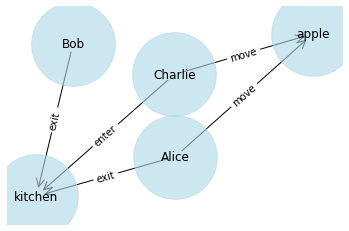

In [12]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.lemma_ 
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx_nodes(self.graph, pos, node_size=7000, node_color='lightblue', alpha=0.6)
        edge_labels = dict([((u, v,), d['relation']) for u, v, d in self.graph.edges(data=True)])
        nx.draw_networkx_edges(self.graph, pos, arrowstyle='->', arrowsize=20)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(self.graph, pos, font_size=12, font_family="sans-serif")
        plt.axis('off')
        plt.show()

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

def get_resulting_state(original_sentence):
    doc = nlp(original_sentence)
    resulting_state = []

    for token in doc:
        # Find the main verb of the sentence to determine the action
        if token.dep_ == "ROOT":
            action = token.lemma_
            subject = [child.text for child in token.children if child.dep_ in ["nsubj", "nsubjpass"]]
            object = [child.text for child in token.children if child.dep_ in ["dobj", "pobj", "attr", "oprd"]]
            prep = [child for child in token.children if child.dep_ == "prep"]
            prep_object = [child.text for p in prep for child in p.children if child.dep_ == "pobj"]

            if action == "move" and subject and object and prep_object:
                # Handle moving an object to a new location
                resulting_state.append(f"The {object[0]} is now in the {prep_object[0]}")
            elif action == "exit" and subject:
                # Handle exiting from a location
                resulting_state.append(f"{subject[0]} has exited")
            elif action == "enter" and subject:
                # Handle entering into a location
                resulting_state.append(f"{subject[0]} has entered")

    return ". ".join(resulting_state) if resulting_state else original_sentence

story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

resulting_state_sentences = [get_resulting_state(sentence) for sentence in story_sentences]

print("Resulting State Sentences:")
for sentence in resulting_state_sentences:
    if sentence:
        print(sentence)

global_context.draw_graph()


In [ ]:
#work on the global stuff and leave the local graphs for Bhaskar

In [ ]:
#Info from the sentences is sent to the local contexts of the witnesses - (process witnesses and send info)

In [ ]:
#local context for each combo (check figure 3)

Global Context Graph:


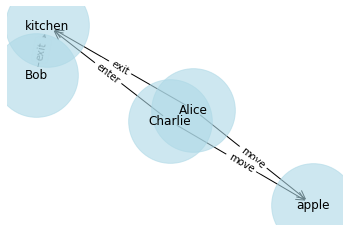

Local Context Graphs:


In [14]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the pre-trained English model
nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.lemma_
                objects = [child.text for child in token.head.children if child.dep_ in ["dobj", "pobj", "attr", "oprd"]]
                for obj in objects:
                    svo_triples.append((subject, verb, obj))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx_nodes(self.graph, pos, node_size=7000, node_color='lightblue', alpha=0.6)
        edge_labels = dict([((u, v,), d['relation']) for u, v, d in self.graph.edges(data=True)])
        nx.draw_networkx_edges(self.graph, pos, arrowstyle='->', arrowsize=20)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(self.graph, pos, font_size=12, font_family="sans-serif")
        plt.axis('off')
        plt.show()

class ProbabilisticGraphsContainer:
    def __init__(self):
        self.local_contexts = {}

    def add_character(self, character):
        if character not in self.local_contexts:
            self.local_contexts[character] = ProbabilisticGraph()

    def propagate_knowledge(self, witnesses, svo_triples):
        for character in witnesses:
            self.add_character(character)
            local_context = self.local_contexts[character]
            for s, v, o in svo_triples:
                local_context.add_edges_from_svo([(s, v, o)])

    def draw_local_graphs(self):
        for character, graph in self.local_contexts.items():
            print(f"Local Context for {character}:")
            graph.draw_graph()

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

# Simulate the determination of witnesses based on sentence content
def determine_witnesses(sentence):
    if "kitchen" in sentence:
        return ["Alice", "Bob", "Charlie"]
    return []

# Mock function for generating resulting state sentences based on the narrative
def get_resulting_state(original_sentence):
    # This function would dynamically generate state sentences based on actions in `original_sentence`
    if "moves" in original_sentence:
        object = original_sentence.split(" moves ")[0].split()[-1]
        location = original_sentence.split(" to the ")[-1].rstrip(".")
        return f"The {object} is now in the {location}."
    return ""

# Main execution starts here
story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

resulting_state_sentences = [get_resulting_state(sentence) for sentence in story_sentences]

local_contexts = ProbabilisticGraphsContainer()

# Update local contexts based on resulting state sentences
for i, sentence in enumerate(story_sentences):
    witnesses = determine_witnesses(sentence)
    resulting_state = resulting_state_sentences[i]
    if resulting_state:  # Only proceed if there's a resulting state to process
        svo_triples = global_context.extract_svo_triples(resulting_state)
        local_contexts.propagate_knowledge(witnesses, svo_triples)

print("Global Context Graph:")
global_context.draw_graph()

print("Local Context Graphs:")
local_contexts.draw_local_graphs()


Global Context Graph:


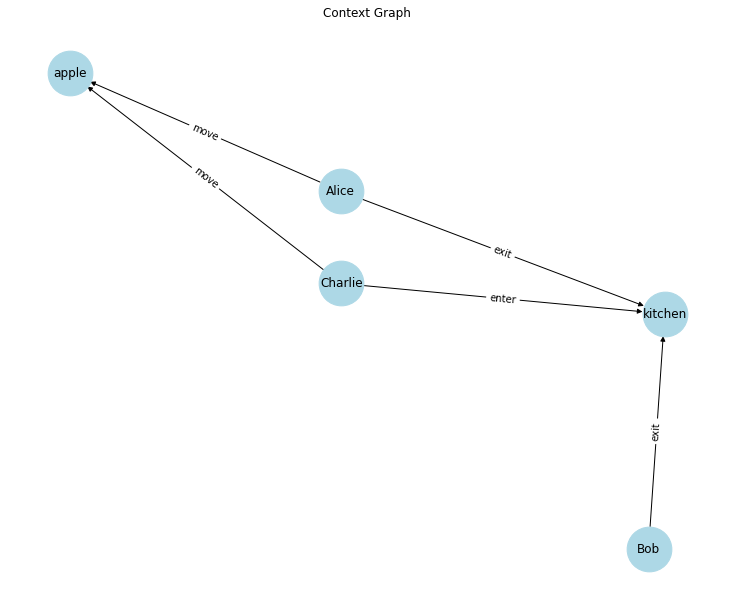

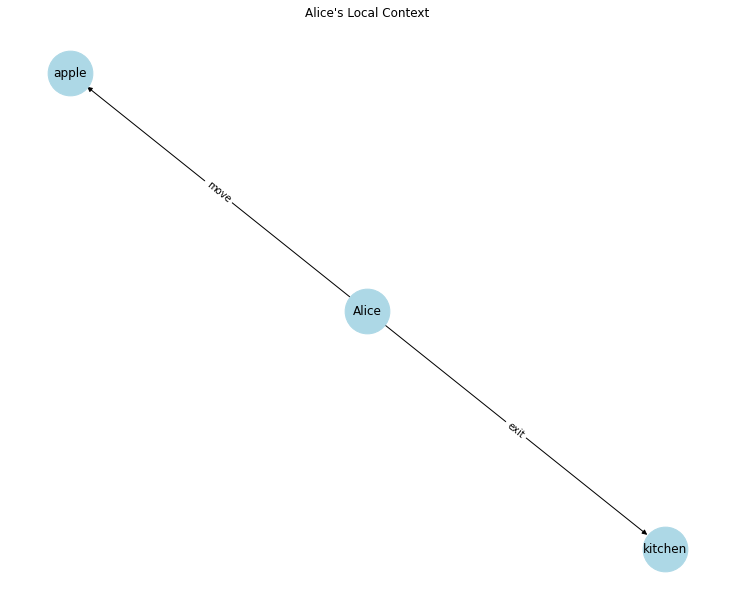

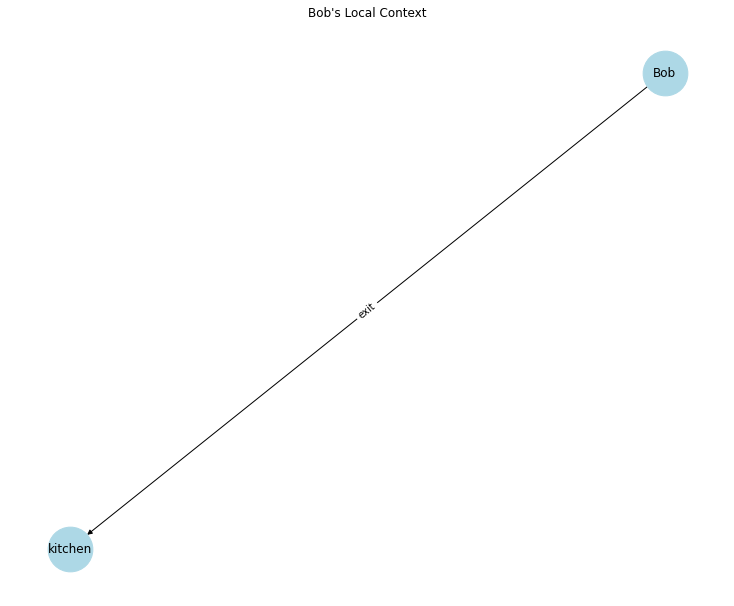

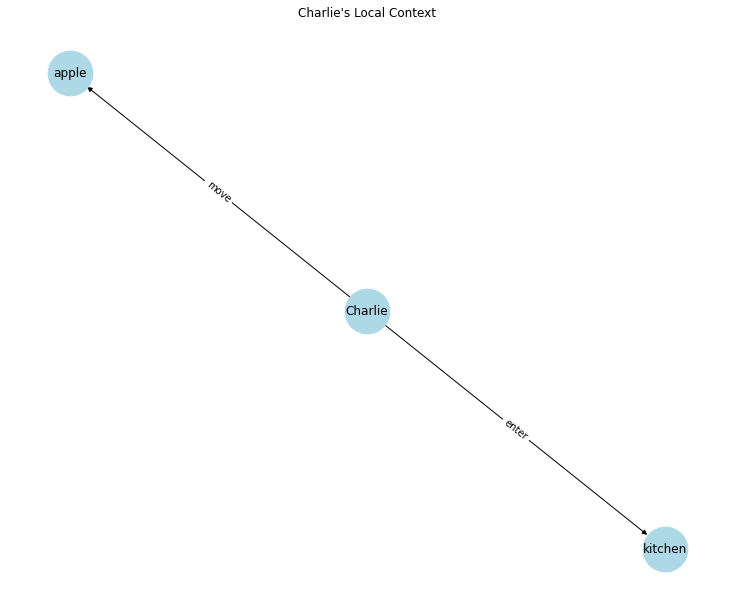

In [15]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the pre-trained English model
nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.lemma_
                objects = [child.text for child in token.head.children if child.dep_ in ["dobj", "pobj", "attr", "oprd"]]
                for obj in objects:
                    svo_triples.append((subject, verb, obj))
        return svo_triples

    def draw_graph(self, title="Context Graph"):
        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(10, 8))
        nx.draw(self.graph, pos, with_labels=True, node_size=2000, node_color='lightblue', arrows=True)
        edge_labels = dict([((u, v,), d['relation']) for u, v, d in self.graph.edges(data=True)])
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        plt.title(title)
        plt.axis('off')
        plt.show()

class ProbabilisticGraphsContainer:
    def __init__(self):
        self.local_contexts = {}

    def add_character(self, character):
        if character not in self.local_contexts:
            self.local_contexts[character] = ProbabilisticGraph()

    def propagate_knowledge(self, witnesses, svo_triples):
        for character in witnesses:
            self.add_character(character)
            local_context = self.local_contexts[character]
            for s, v, o in svo_triples:
                local_context.add_edges_from_svo([(s, v, o)])

    def draw_local_graphs(self):
        for character, graph in self.local_contexts.items():
            graph.draw_graph(f"{character}'s Local Context")

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

# Predetermined list of witnesses for each sentence
witnesses_list = [
    ["Alice", "Bob"],
    [],
    [],
    ["Alice"],
    [],
    ["Bob"],
    ["Alice"],
    ["Charlie"],
    ["Charlie"],
    []
]

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

local_contexts = ProbabilisticGraphsContainer()

# Simulate SVO extraction and knowledge propagation for local contexts
for sentence, witnesses in zip(story_sentences, witnesses_list):
    svo_triples = global_context.extract_svo_triples(sentence)
    local_contexts.propagate_knowledge(witnesses, svo_triples)

print("Global Context Graph:")
global_context.draw_graph()

# Draw local context graphs
local_contexts.draw_local_graphs()


Global Context Graph:


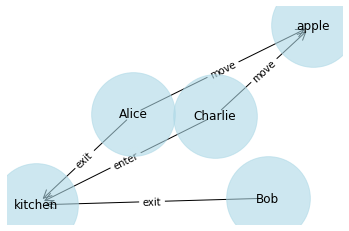

Local Context Graphs:
Alice's Local Context Graph:


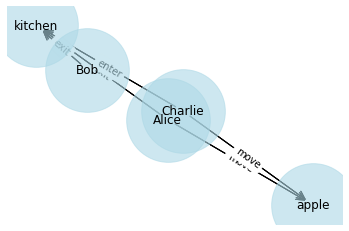

Bob's Local Context Graph:


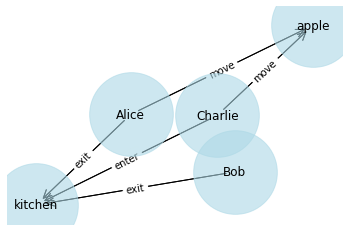

Charlie's Local Context Graph:


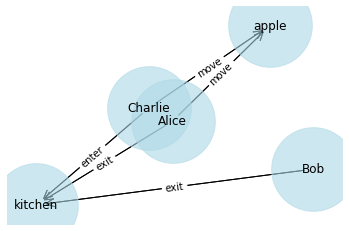

In [23]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the pre-trained English model
nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.lemma_ 
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx_nodes(self.graph, pos, node_size=7000, node_color='lightblue', alpha=0.6)
        edge_labels = dict([((u, v,), d['relation']) for u, v, d in self.graph.edges(data=True)])
        nx.draw_networkx_edges(self.graph, pos, arrowstyle='->', arrowsize=20)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(self.graph, pos, font_size=12, font_family="sans-serif")
        plt.axis('off')
        plt.show()

class ProbabilisticGraphsContainer:
    def __init__(self):
        self.local_contexts = {}

    def add_character(self, character):
        if character not in self.local_contexts:
            self.local_contexts[character] = ProbabilisticGraph()

    def propagate_knowledge(self, global_context, witnesses):
        for character in witnesses:
            self.add_character(character)
            local_context = self.local_contexts[character]
            for edge in global_context.graph.edges(data=True):
                local_context.graph.add_edge(edge[0], edge[1], relation=edge[2]['relation'])

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

def get_resulting_state(original_sentence):
    doc = nlp(original_sentence)
    resulting_state = []

    for token in doc:
        if token.dep_ == "ROOT":
            action = token.lemma_
            subject = [child.text for child in token.children if child.dep_ in ["nsubj", "nsubjpass"]]
            object = [child.text for child in token.children if child.dep_ in ["dobj", "pobj", "attr", "oprd"]]
            prep = [child for child in token.children if child.dep_ == "prep"]
            prep_object = [child.text for p in prep for child in p.children if child.dep_ == "pobj"]

            if action == "move" and subject and object and prep_object:
                resulting_state.append(f"{subject[0]} moved the {object[0]} to the {prep_object[0]}")
            elif action == "exit" and subject:
                resulting_state.append(f"{subject[0]} exited")
            elif action == "enter" and subject and object:
                resulting_state.append(f"{subject[0]} entered the {object[0]}")

    return ". ".join(resulting_state) if resulting_state else original_sentence


def extract_svo_triples(sentence):
    doc = nlp(sentence)
    svo_triples = []
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            subject = token.text
            verb = token.head.text
            for child in token.head.children:
                if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                    object = child.text
                    svo_triples.append((subject, verb, object))
    return svo_triples

def extract_characters(sentence):
    doc = nlp(sentence)
    characters = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters.append(ent.text)
    return characters

def update_local_contexts(global_context, local_contexts, resulting_state_sentences, story_sentences):
    for resulting_state, original_sentence in zip(resulting_state_sentences, story_sentences):
        svo_triples = extract_svo_triples(resulting_state)
        characters = extract_characters(original_sentence)
        local_contexts.propagate_knowledge(global_context, characters)

# Example usage
story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

local_contexts = ProbabilisticGraphsContainer()

# Generate resulting state sentences
resulting_state_sentences = []
for sentence in story_sentences:
    resulting_state = get_resulting_state(sentence)
    resulting_state_sentences.append(resulting_state)

# Update local contexts based on resulting state sentences
update_local_contexts(global_context, local_contexts, resulting_state_sentences, story_sentences)

print("Global Context Graph:")
global_context.draw_graph()

print("Local Context Graphs:")
for character, local_context in local_contexts.local_contexts.items():
    print(f"{character}'s Local Context Graph:")
    local_context.draw_graph()

Global Context Graph:


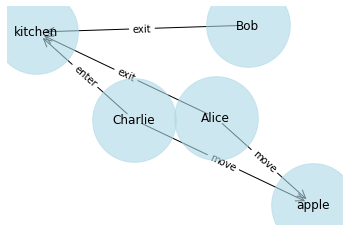

Local Context Graphs:
Alice's Local Context Graph:


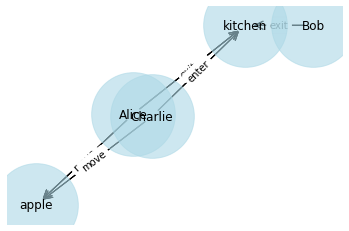

Bob's Local Context Graph:


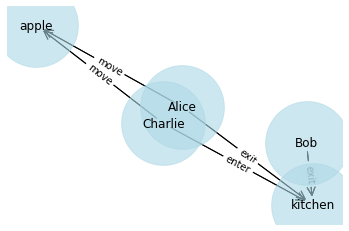

Charlie's Local Context Graph:


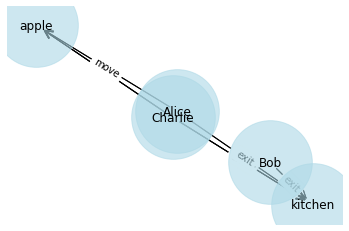

In [31]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the pre-trained English model
nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.lemma_ 
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx_nodes(self.graph, pos, node_size=7000, node_color='lightblue', alpha=0.6)
        edge_labels = dict([((u, v,), d['relation']) for u, v, d in self.graph.edges(data=True)])
        nx.draw_networkx_edges(self.graph, pos, arrowstyle='->', arrowsize=20)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(self.graph, pos, font_size=12, font_family="sans-serif")
        plt.axis('off')
        plt.show()

class ProbabilisticGraphsContainer:
    def __init__(self):
        self.local_contexts = {}

    def add_character(self, character):
        if character not in self.local_contexts:
            self.local_contexts[character] = ProbabilisticGraph()

    def propagate_knowledge(self, global_context, witnesses):
        for character in witnesses:
            self.add_character(character)
            local_context = self.local_contexts[character]
            for edge in global_context.graph.edges(data=True):
                local_context.graph.add_edge(edge[0], edge[1], relation=edge[2]['relation'])

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

def get_resulting_state(original_sentence):
    doc = nlp(original_sentence)
    resulting_state = []

    for token in doc:
        if token.dep_ == "ROOT":
            action = token.lemma_
            subject = [child.text for child in token.children if child.dep_ in ["nsubj", "nsubjpass"]]
            object = [child.text for child in token.children if child.dep_ in ["dobj", "pobj", "attr", "oprd"]]
            prep = [child for child in token.children if child.dep_ == "prep"]
            prep_object = [child.text for p in prep for child in p.children if child.dep_ == "pobj"]

            if action == "move" and subject and object and prep_object:
                resulting_state.append(f"{subject[0]} moved the {object[0]} to the {prep_object[0]}")
            elif action == "exit" and subject:
                resulting_state.append(f"{subject[0]} exited")
            elif action == "enter" and subject and object:
                resulting_state.append(f"{subject[0]} entered the {object[0]}")

    return ". ".join(resulting_state) if resulting_state else original_sentence


def extract_svo_triples(sentence):
    doc = nlp(sentence)
    svo_triples = []
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            subject = token.text
            verb = token.head.text
            for child in token.head.children:
                if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                    object = child.text
                    svo_triples.append((subject, verb, object))
    return svo_triples

def extract_characters(sentence):
    doc = nlp(sentence)
    characters = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters.append(ent.text)
    return characters

def update_local_contexts(global_context, local_contexts, story_sentences):
    for i, sentence in enumerate(story_sentences):
        characters = extract_characters(sentence)
        
        # Extract SVO triples from the current sentence
        svo_triples = extract_svo_triples(sentence)
        
        # Update the local context graphs of all characters present in the current sentence
        for character in characters:
            local_contexts.add_character(character)
            local_context = local_contexts.local_contexts[character]
            local_context.add_edges_from_svo(svo_triples)
        
        # Propagate the knowledge from the global context to the local contexts of the characters in the current sentence
        local_contexts.propagate_knowledge(global_context, characters)

# Example usage
story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

local_contexts = ProbabilisticGraphsContainer()

# Update local contexts based on the story sentences
update_local_contexts(global_context, local_contexts, story_sentences)

print("Global Context Graph:")
global_context.draw_graph()

print("Local Context Graphs:")
for character, local_context in local_contexts.local_contexts.items():
    print(f"{character}'s Local Context Graph:")
    local_context.draw_graph()

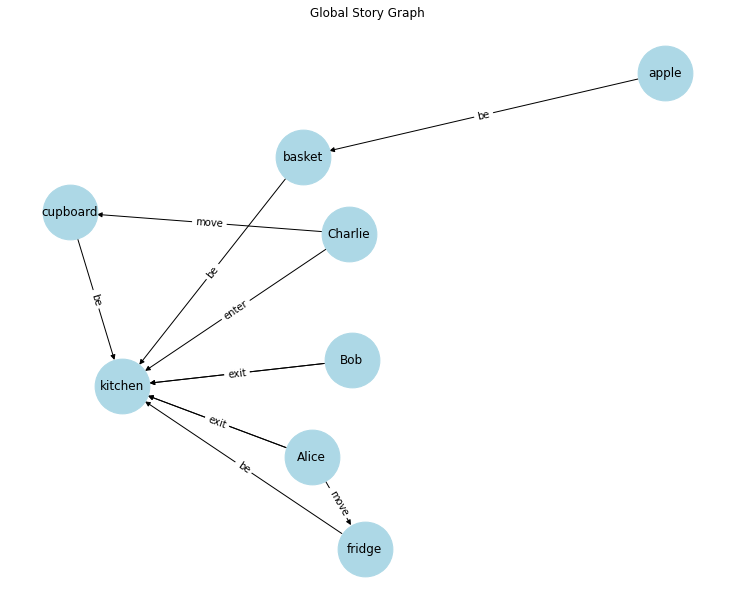

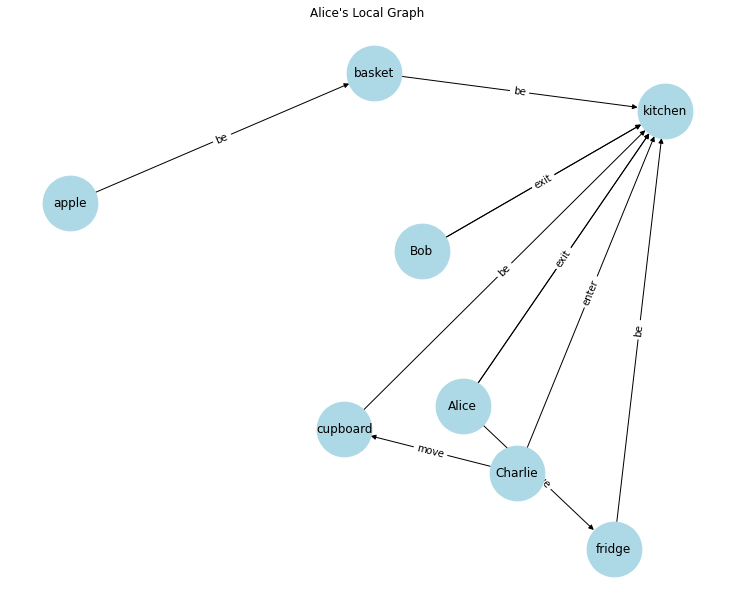

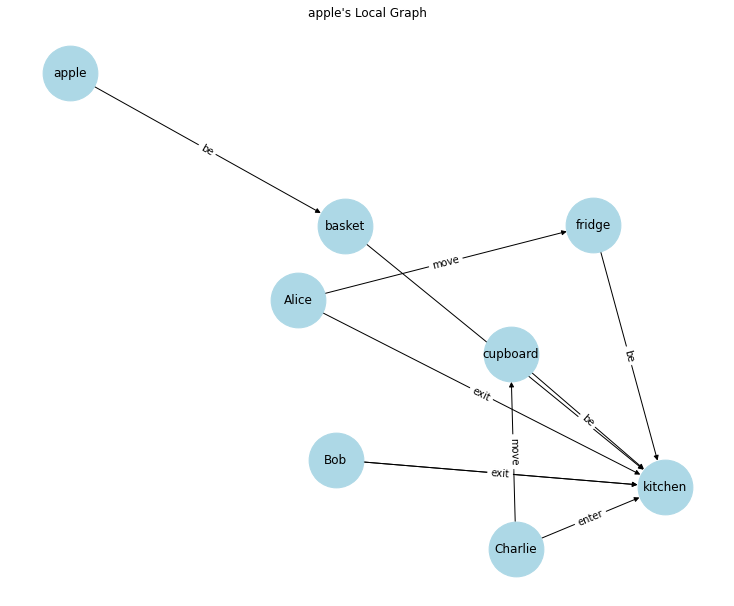

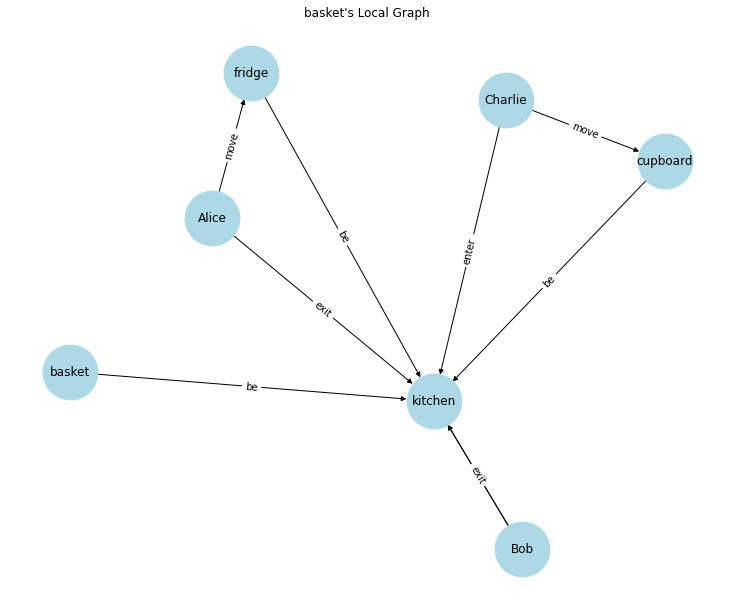

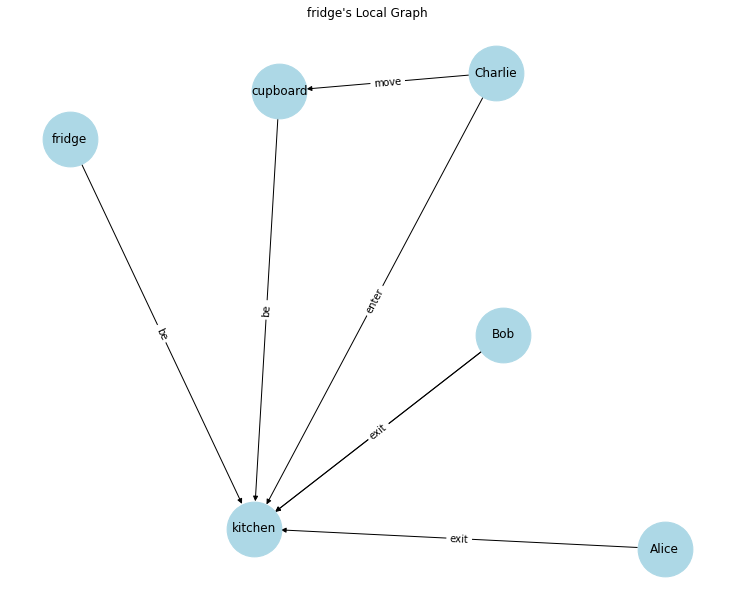

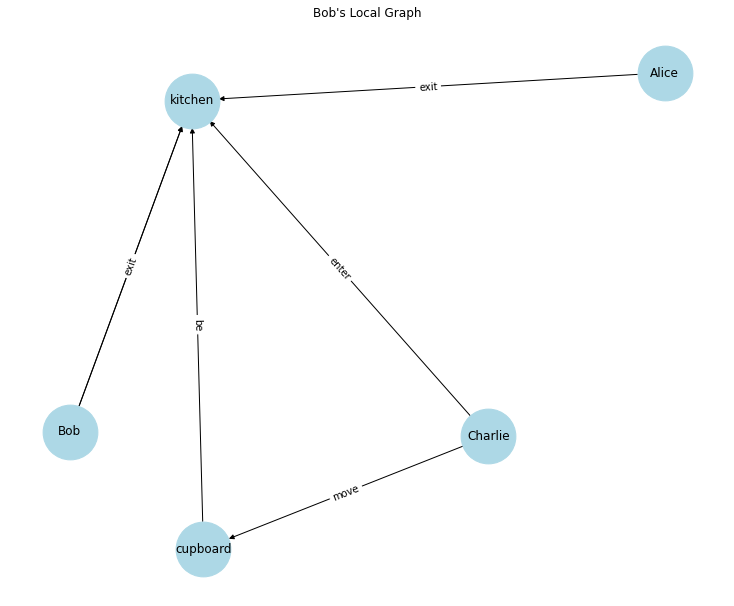

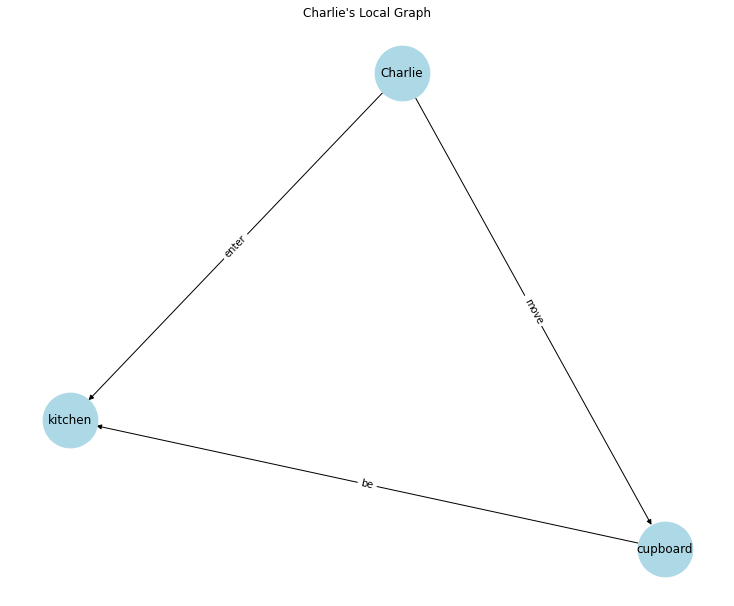

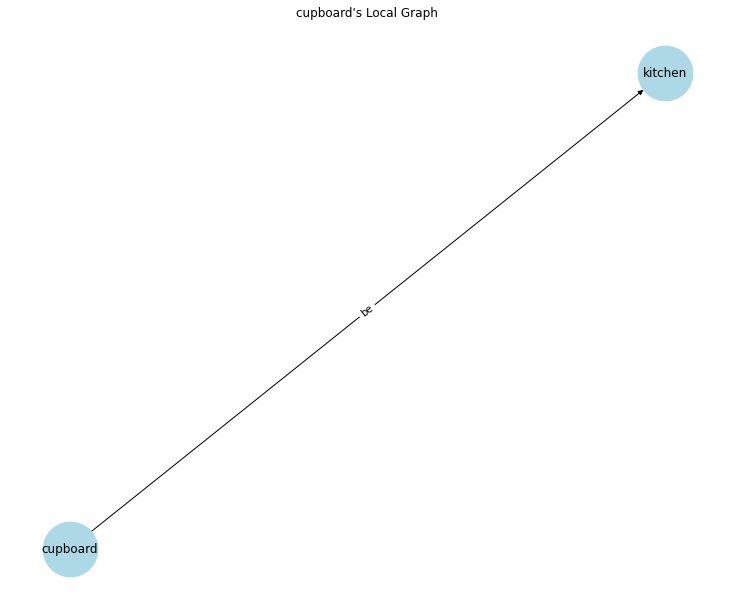

In [41]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load Spacy's English model
nlp = spacy.load("en_core_web_sm")

class StoryGraph:
    def __init__(self):
        self.global_graph = nx.MultiDiGraph()
        self.local_graphs = {}
        self.character_locations = {}

    def update_character_location(self, character, location):
        self.character_locations[character] = location
        # Ensure each character has a local graph
        if character not in self.local_graphs:
            self.local_graphs[character] = nx.MultiDiGraph()

    def add_event_to_global_graph(self, subject, action, obj=None):
        if obj:
            self.global_graph.add_edge(subject, obj, action=action)
        else:
            self.global_graph.add_node(subject, action=action)

    def add_event_to_local_graphs(self, subject, action, obj=None):
        # Update character's local graph if they're present at the location of the action or involved
        for character, location in self.character_locations.items():
            if character == subject or location == self.character_locations.get(obj):
                if obj:
                    self.local_graphs[character].add_edge(subject, obj, action=action)
                else:
                    self.local_graphs[character].add_node(subject, action=action)

    def process_sentence(self, sentence):
        doc = nlp(sentence)
        subject, action, obj = None, None, None
        for token in doc:
            if token.dep_ == "nsubj":
                subject = token.text
                if subject not in self.character_locations:
                    self.update_character_location(subject, None)  # Add character without a location
            elif token.dep_ == "ROOT":
                action = token.lemma_
            elif token.dep_ in ["dobj", "pobj", "attr"]:
                obj = token.text
            elif token.dep_ == "prep" and list(token.children):
                prep_obj = list(token.children)[0].text
                if prep_obj in ["kitchen", "fridge", "cupboard", "basket"]:
                    obj = prep_obj

        # Update global graph
        self.add_event_to_global_graph(subject, action, obj)

        # Update character locations if the action involves movement
        if action in ["enters", "exits", "moves"] and obj:
            self.update_character_location(subject, obj)

        # Update local graphs based on the ability to witness the event
        self.add_event_to_local_graphs(subject, action, obj)

    def draw_graph(self, graph, title=""):
        pos = nx.spring_layout(graph)
        plt.figure(figsize=(10, 8))
        nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightblue', arrows=True)
        edge_labels = dict(((u, v,), d['action']) for u, v, d in graph.edges(data=True))
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
        plt.title(title)
        plt.axis('off')
        plt.show()

    def display_all_graphs(self):
        # Display the global graph
        self.draw_graph(self.global_graph, "Global Story Graph")
        # Display each local graph
        for character, graph in self.local_graphs.items():
            self.draw_graph(graph, f"{character}'s Local Graph")

# Initialize the story graph
story_graph = StoryGraph()

# Define the story sentences
story_sentences = [
    "Alice enters the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob enters the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

# Process each sentence in the story
for sentence in story_sentences:
    story_graph.process_sentence(sentence)

# Display all graphs
story_graph.display_all_graphs()


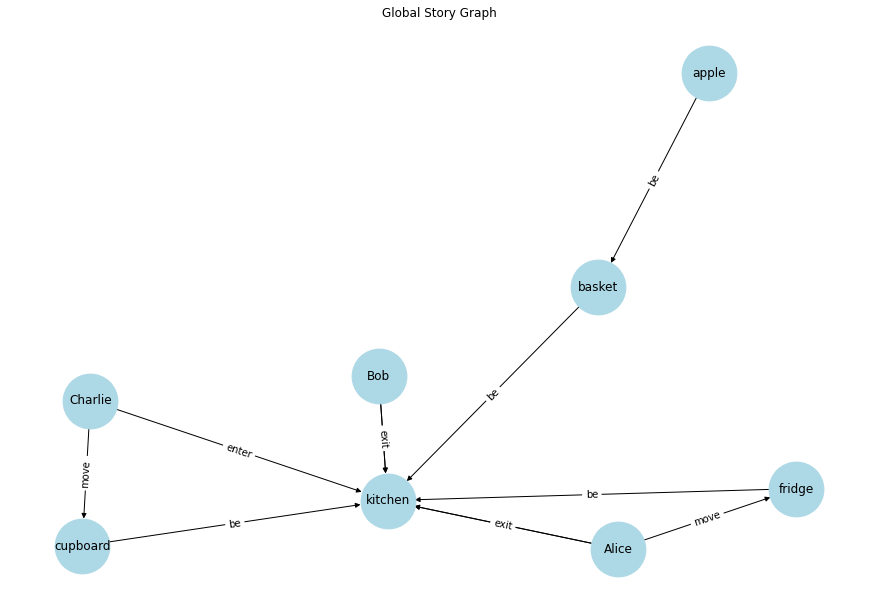

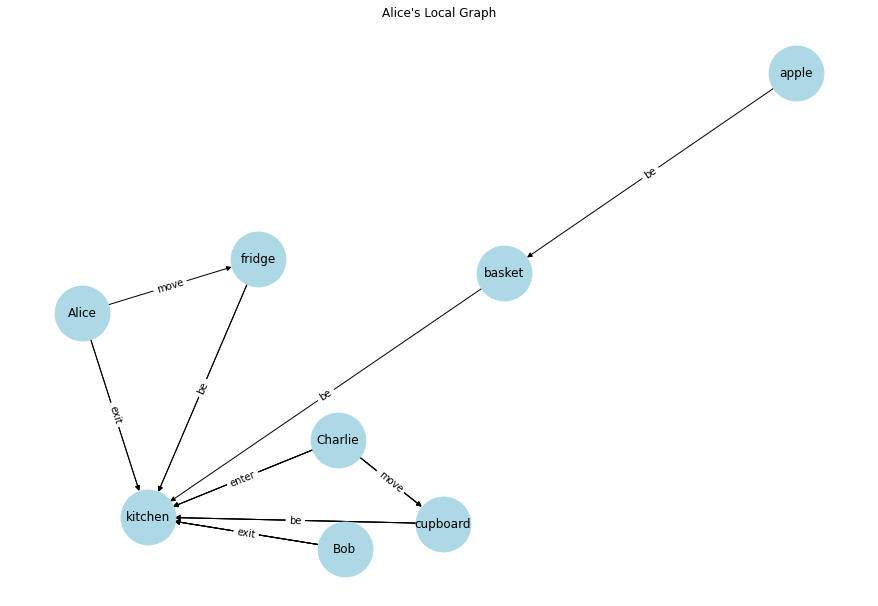

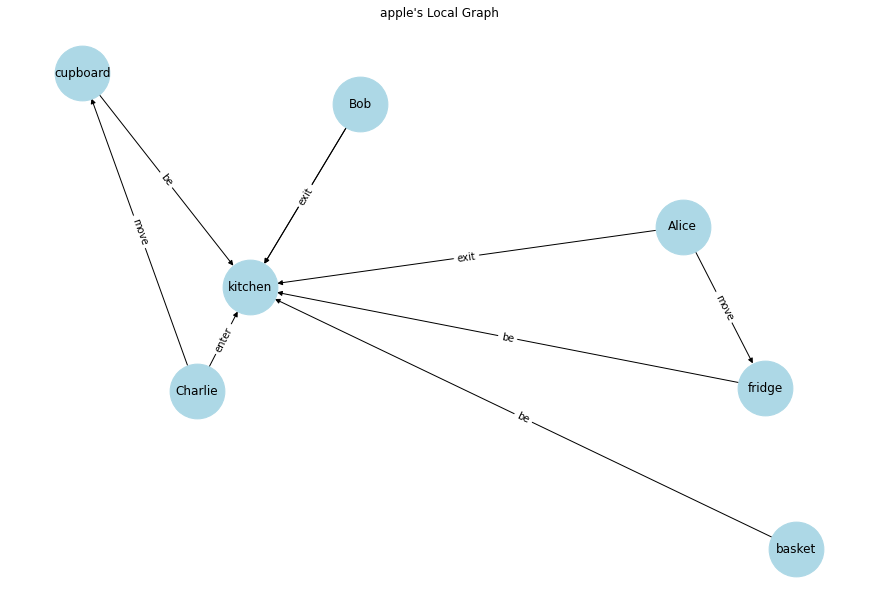

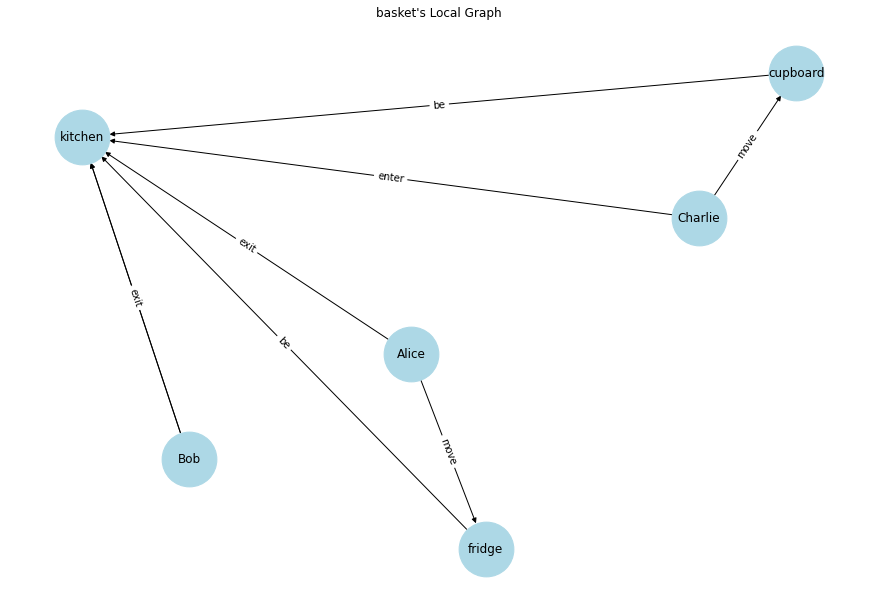

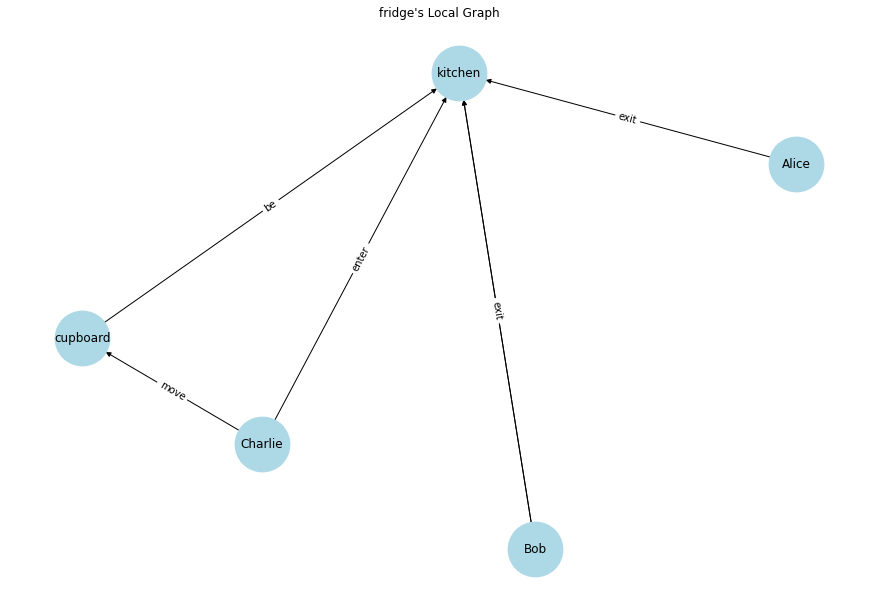

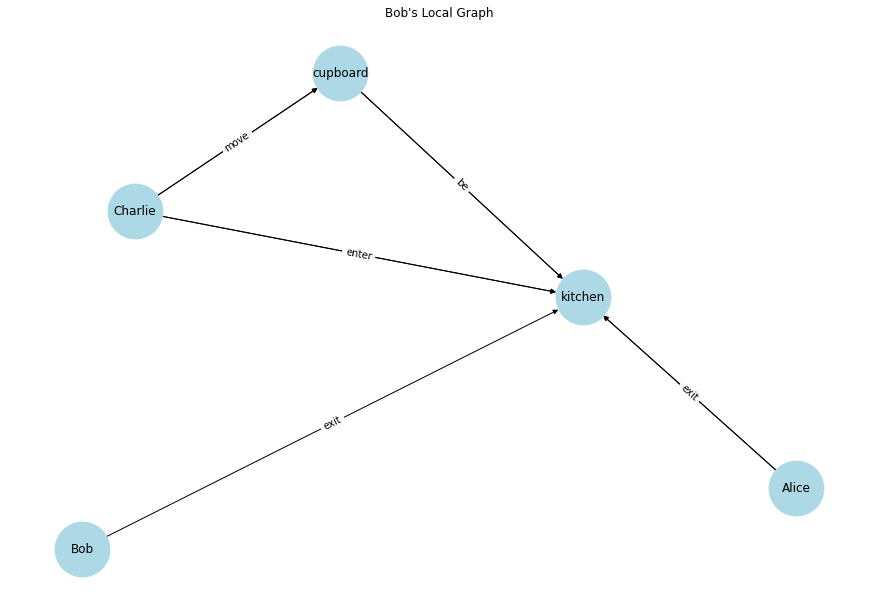

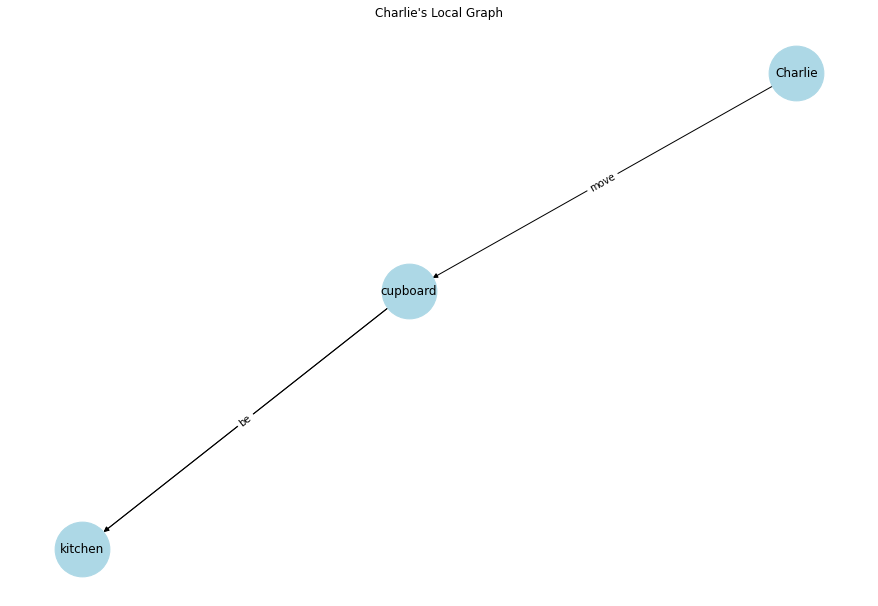

In [48]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

class StoryGraph:
    def __init__(self):
        self.global_graph = nx.MultiDiGraph()
        self.local_graphs = {}
        self.character_locations = {}
        self.location_history = {}  # Tracks who was in a location at the time of each action

    def update_character_location(self, character, location, action=None):
        # If a character exits, they're removed from the current location's history
        if action == "exits":
            self.character_locations[character] = None
            if character in self.location_history.get(location, []):
                self.location_history[location].remove(character)
        else:
            self.character_locations[character] = location
            # Add character to the location's history
            if location not in self.location_history:
                self.location_history[location] = [character]
            else:
                self.location_history[location].append(character)

    def add_event(self, subject, action, obj=None):
        # Add the event to the global graph
        if obj:
            self.global_graph.add_edge(subject, obj, action=action)
        else:
            self.global_graph.add_node(subject, action=action)

        # Determine the relevant location for the event
        location = self.character_locations.get(subject)
        if action in ["enters", "exits"]:
            location = obj

        # Update local graphs for characters who were present
        if action == "enters" or location in self.location_history:
            for character in self.location_history.get(location, []):
                if character not in self.local_graphs:
                    self.local_graphs[character] = nx.MultiDiGraph()
                if obj:
                    self.local_graphs[character].add_edge(subject, obj, action=action)
                else:
                    self.local_graphs[character].add_node(subject, action=action)

        # Update character locations after processing the current action
        self.update_character_location(subject, location, action)

    def process_sentence(self, sentence):
        doc = nlp(sentence)
        subject, action, obj = None, None, None
        for token in doc:
            if token.dep_ == "nsubj":
                subject = token.text
            elif token.dep_ == "ROOT":
                action = token.lemma_
            elif token.dep_ in ["dobj", "pobj", "attr"]:
                obj = token.text

        self.add_event(subject, action, obj)

    def draw_graph(self, graph, title=""):
        pos = nx.spring_layout(graph)
        plt.figure(figsize=(12, 8))
        nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightblue', arrows=True)
        edge_labels = dict(((u, v,), d['action']) for u, v, d in graph.edges(data=True))
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
        plt.title(title)
        plt.axis('off')
        plt.show()

    def display_all_graphs(self):
        self.draw_graph(self.global_graph, "Global Story Graph")
        for character, graph in self.local_graphs.items():
            self.draw_graph(graph, f"{character}'s Local Graph")

# Initialize the story graph
story_graph = StoryGraph()

# Define the story sentences
story_sentences = [
    "Alice enters the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob enters the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

# Process each sentence in the story
for sentence in story_sentences:
    story_graph.process_sentence(sentence)

# Display all graphs
story_graph.display_all_graphs()


Global Context Graph:


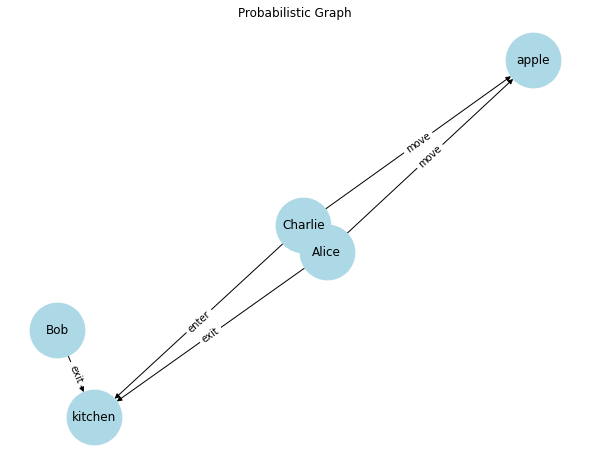

Local Context Graphs:
Alice's Local Context Graph:


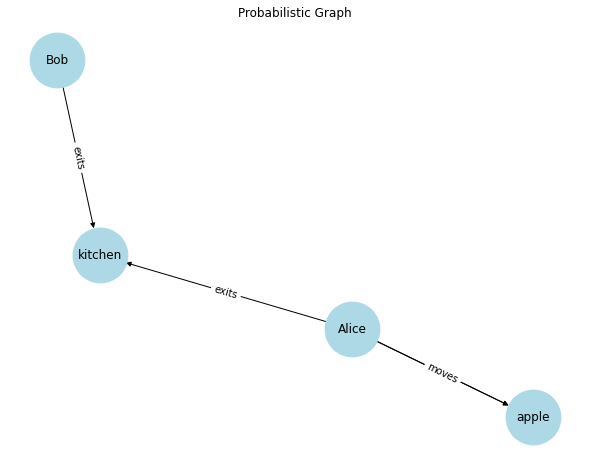

Bob's Local Context Graph:


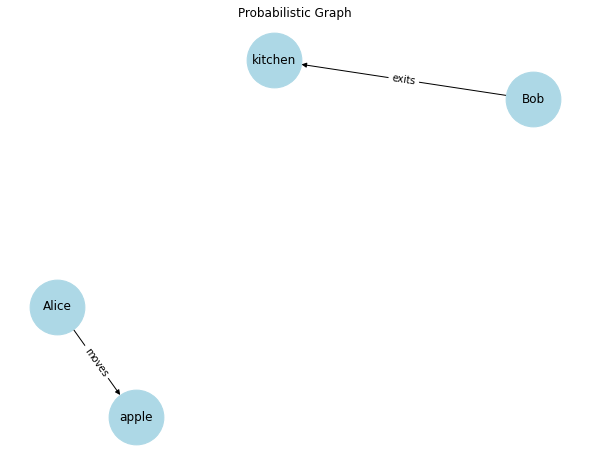

Charlie's Local Context Graph:


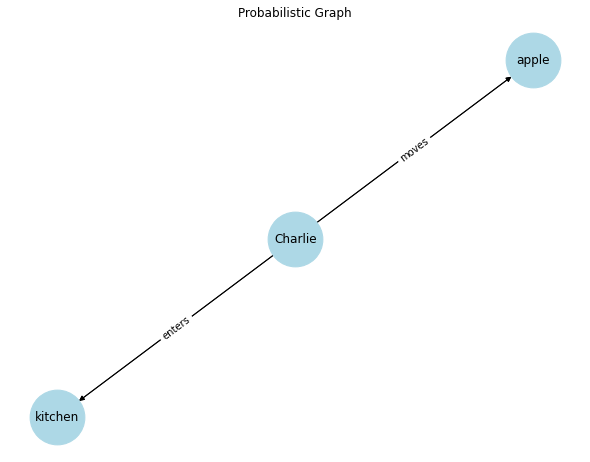

In [61]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.lemma_ 
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, pos, with_labels=True, node_size=3000, node_color='lightblue', arrows=True)
        edge_labels = {(u, v): d['relation'] for u, v, d in self.graph.edges(data=True)}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        plt.title("Probabilistic Graph")
        plt.axis('off')
        plt.show()

class ProbabilisticGraphsContainer:
    def __init__(self):
        self.local_contexts = {}

    def add_character(self, character):
        if character not in self.local_contexts:
            self.local_contexts[character] = ProbabilisticGraph()

    def propagate_knowledge(self, global_context, witnesses):
        for character in witnesses:
            if character in self.local_contexts:  # Only propagate knowledge for characters in the local context
                local_context = self.local_contexts[character]
                for edge in global_context.graph.edges(data=True):
                    local_context.graph.add_edge(edge[0], edge[1], relation=edge[2]['relation'])

def update_global_context(global_context, sentences):
    for sentence in sentences:
        svo_triples = global_context.extract_svo_triples(sentence)
        global_context.add_edges_from_svo(svo_triples)

def extract_svo_triples(sentence):
    doc = nlp(sentence)
    svo_triples = []
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            subject = token.text
            verb = token.head.text
            for child in token.head.children:
                if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                    object = child.text
                    svo_triples.append((subject, verb, object))
    return svo_triples

def extract_characters(sentence):
    doc = nlp(sentence)
    characters = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters.append(ent.text)
    return characters

def update_local_contexts(global_context, local_contexts, story_sentences):
    current_characters = set()
    for i, sentence in enumerate(story_sentences):
        characters = extract_characters(sentence)
        
        # Extract SVO triples from the current sentence
        svo_triples = extract_svo_triples(sentence)
        
        # Update the local context graphs of characters directly involved in the current sentence
        for character in characters:
            local_contexts.add_character(character)
            local_context = local_contexts.local_contexts[character]
            local_context.add_edges_from_svo(svo_triples)
        
        # Remove characters who exit the scene from the current set of characters
        if "exits" in sentence.lower():
            for character in characters:
                current_characters.discard(character)
        else:
            # Add characters who enter the scene to the current set of characters
            current_characters.update(characters)
        
        # Propagate the knowledge from the global context to the local contexts of the characters in the current sentence
        for character in current_characters:
            if character in local_contexts.local_contexts:
                local_context = local_contexts.local_contexts[character]
                local_context.add_edges_from_svo(svo_triples)

# Example usage
story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_context(global_context, story_sentences)

local_contexts = ProbabilisticGraphsContainer()

# Update local contexts based on the story sentences
update_local_contexts(global_context, local_contexts, story_sentences)

print("Global Context Graph:")
global_context.draw_graph()

print("Local Context Graphs:")
for character, local_context in local_contexts.local_contexts.items():
    print(f"{character}'s Local Context Graph:")
    local_context.draw_graph()


Global Context Graph:


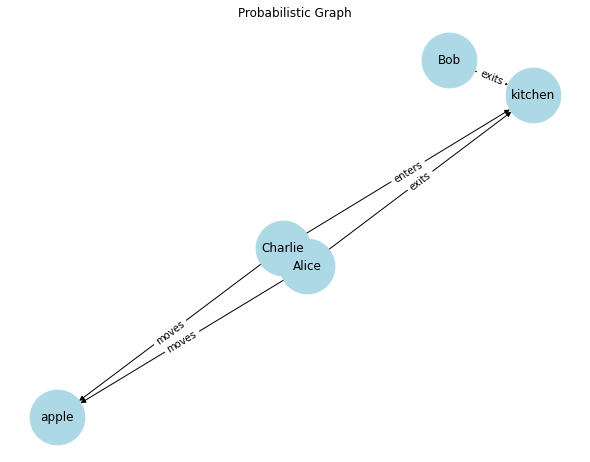

Local Context Graphs:
Alice's Local Context Graph:


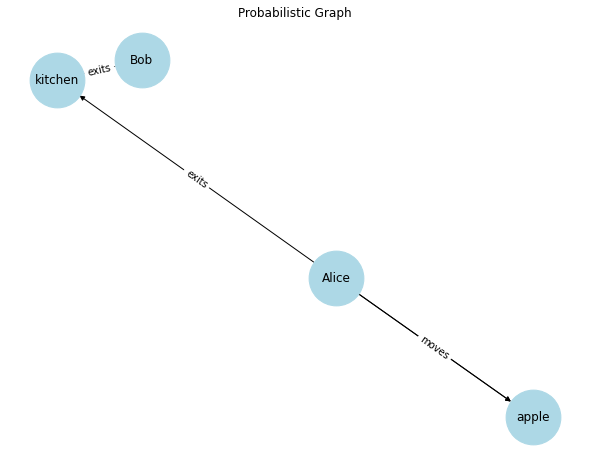

Bob's Local Context Graph:


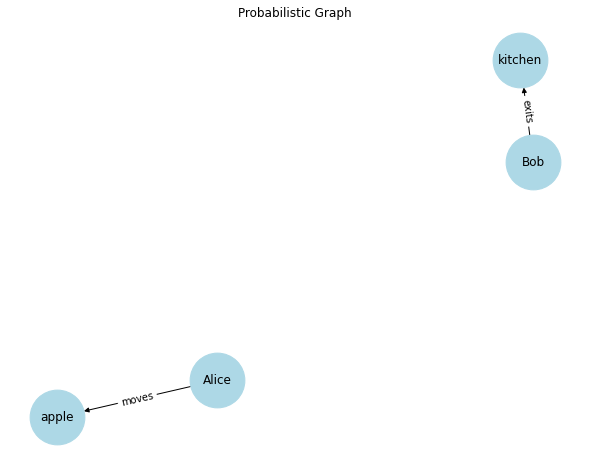

Charlie's Local Context Graph:


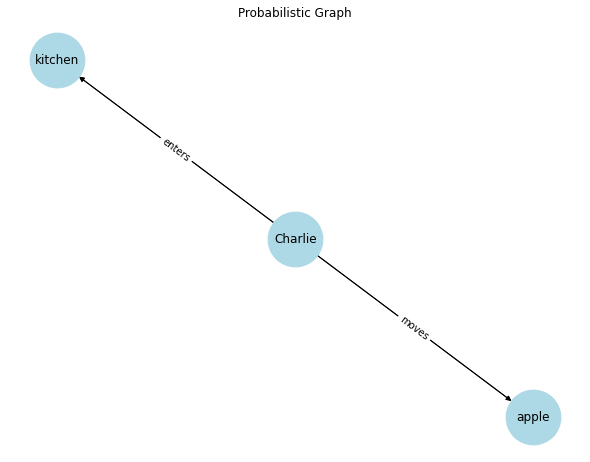

In [63]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.lemma_ 
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, pos, with_labels=True, node_size=3000, node_color='lightblue', arrows=True)
        edge_labels = {(u, v): d['relation'] for u, v, d in self.graph.edges(data=True)}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        plt.title("Probabilistic Graph")
        plt.axis('off')
        plt.show()

class ProbabilisticGraphsContainer:
    def __init__(self):
        self.local_contexts = {}

    def add_character(self, character):
        self.local_contexts.setdefault(character, ProbabilisticGraph())

    def propagate_knowledge(self, global_context, witnesses):
        for character in witnesses:
            if character in self.local_contexts:  # Only propagate knowledge for characters in the local context
                local_context = self.local_contexts[character]
                for edge in global_context.graph.edges(data=True):
                    local_context.graph.add_edge(edge[0], edge[1], relation=edge[2]['relation'])

def update_global_and_extract_svo(global_context, sentences):
    for sentence in sentences:
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.text
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        global_context.add_edges_from_svo(svo_triples)

def extract_characters(sentence):
    doc = nlp(sentence)
    characters = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters.append(ent.text)
    return characters

def update_local_contexts(global_context, local_contexts, story_sentences):
    current_characters = set()
    for i, sentence in enumerate(story_sentences):
        characters = extract_characters(sentence)
        
        # Extract SVO triples from the current sentence
        svo_triples = []
        doc = nlp(sentence)
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.text
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        
        # Update the local context graphs of characters directly involved in the current sentence
        for character in characters:
            local_contexts.add_character(character)
            local_context = local_contexts.local_contexts[character]
            local_context.add_edges_from_svo(svo_triples)
        
        # Remove characters who exit the scene from the current set of characters
        if "exits" in sentence.lower():
            for character in characters:
                current_characters.discard(character)
        else:
            # Add characters who enter the scene to the current set of characters
            current_characters.update(characters)
        
        # Propagate the knowledge from the global context to the local contexts of the characters in the current sentence
        for character in current_characters:
            if character in local_contexts.local_contexts:
                local_context = local_contexts.local_contexts[character]
                local_context.add_edges_from_svo(svo_triples)

# Example usage
story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_and_extract_svo(global_context, story_sentences)

local_contexts = ProbabilisticGraphsContainer()

# Update local contexts based on the story sentences
update_local_contexts(global_context, local_contexts, story_sentences)

print("Global Context Graph:")
global_context.draw_graph()

print("Local Context Graphs:")
for character, local_context in local_contexts.local_contexts.items():
    print(f"{character}'s Local Context Graph:")
    local_context.draw_graph()


Global Context Graph:


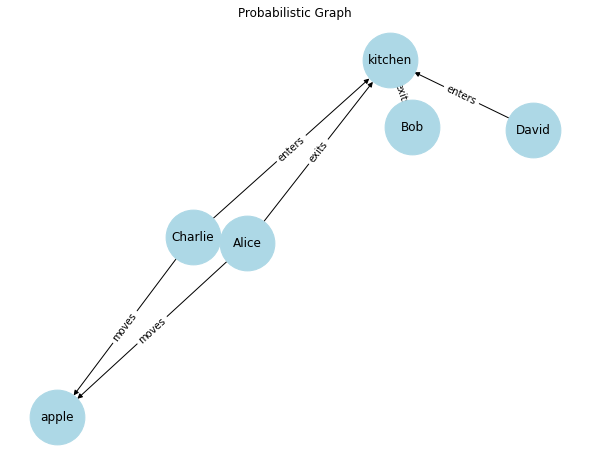

Local Context Graphs:
Alice's Local Context Graph:


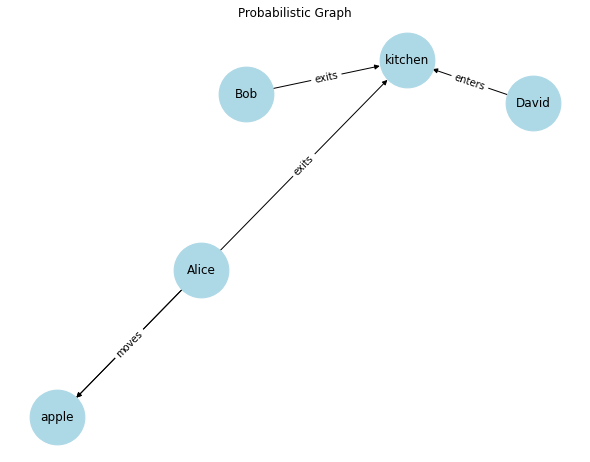

Bob's Local Context Graph:


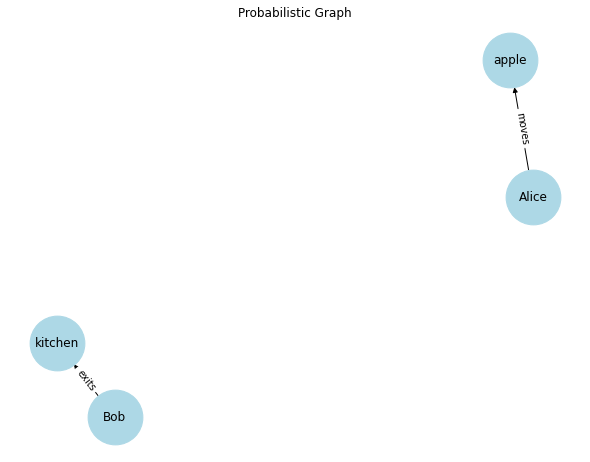

David's Local Context Graph:


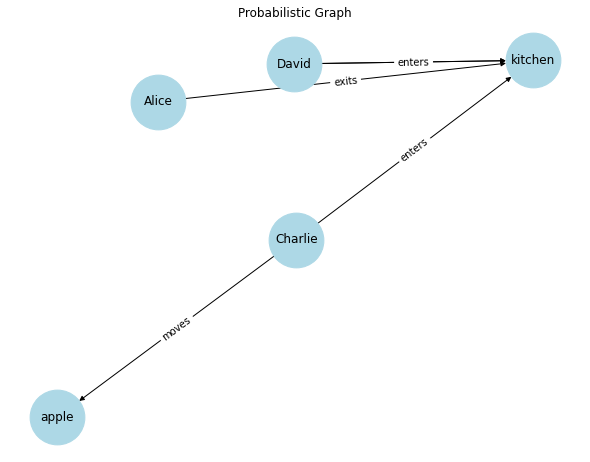

Charlie's Local Context Graph:


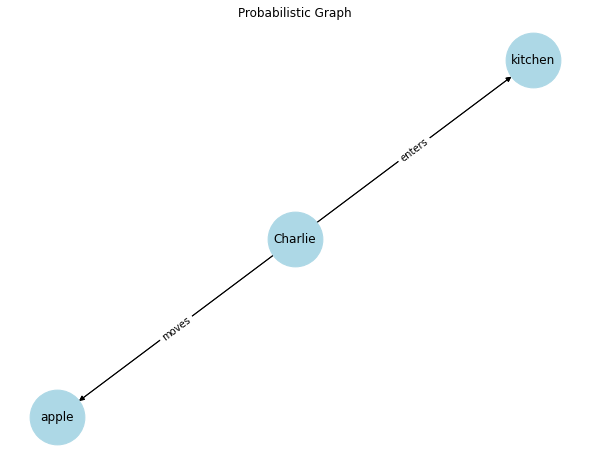

In [64]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

class ProbabilisticGraph:
    def __init__(self):
        self.graph = nx.MultiDiGraph()

    def add_edges_from_svo(self, svo_triples):
        for s, v, o in svo_triples:
            self.graph.add_edge(s, o, relation=v)

    def extract_svo_triples(self, sentence):
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.lemma_ 
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        return svo_triples

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, pos, with_labels=True, node_size=3000, node_color='lightblue', arrows=True)
        edge_labels = {(u, v): d['relation'] for u, v, d in self.graph.edges(data=True)}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        plt.title("Probabilistic Graph")
        plt.axis('off')
        plt.show()

class ProbabilisticGraphsContainer:
    def __init__(self):
        self.local_contexts = {}

    def add_character(self, character):
        self.local_contexts.setdefault(character, ProbabilisticGraph())

    def propagate_knowledge(self, global_context, witnesses):
        for character in witnesses:
            if character in self.local_contexts:  # Only propagate knowledge for characters in the local context
                local_context = self.local_contexts[character]
                for edge in global_context.graph.edges(data=True):
                    local_context.graph.add_edge(edge[0], edge[1], relation=edge[2]['relation'])

def update_global_and_extract_svo(global_context, sentences):
    for sentence in sentences:
        doc = nlp(sentence)
        svo_triples = []
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.text
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        global_context.add_edges_from_svo(svo_triples)

def extract_characters(sentence):
    doc = nlp(sentence)
    characters = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters.append(ent.text)
    return characters

def update_local_contexts(global_context, local_contexts, story_sentences):
    current_characters = set()
    for i, sentence in enumerate(story_sentences):
        characters = extract_characters(sentence)
        
        # Extract SVO triples from the current sentence
        svo_triples = []
        doc = nlp(sentence)
        for token in doc:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                subject = token.text
                verb = token.head.text
                for child in token.head.children:
                    if child.dep_ in ["dobj", "pobj", "attr", "oprd"]:
                        object = child.text
                        svo_triples.append((subject, verb, object))
        
        # Update the local context graphs of characters directly involved in the current sentence
        for character in characters:
            local_contexts.add_character(character)
            local_context = local_contexts.local_contexts[character]
            local_context.add_edges_from_svo(svo_triples)
        
        # Remove characters who exit the scene from the current set of characters
        if "exits" in sentence.lower():
            for character in characters:
                current_characters.discard(character)
        else:
            # Add characters who enter the scene to the current set of characters
            current_characters.update(characters)
        
        # Propagate the knowledge from the global context to the local contexts of the characters in the current sentence
        for character in current_characters:
            if character in local_contexts.local_contexts:
                local_context = local_contexts.local_contexts[character]
                local_context.add_edges_from_svo(svo_triples)

# Example usage
story_sentences = [
    "Alice and Bob are in the kitchen.",
    "The apple is in the basket.",
    "The basket is in the kitchen.",
    "Alice moves the apple to the fridge.",
    "The fridge is in the kitchen.",
    "Bob exits the kitchen.",
    "David enters the kitchen.",
    "Alice exits the kitchen.",
    "Charlie enters the kitchen.",
    "Charlie moves the apple to the cupboard.",
    "The cupboard is in the kitchen."
]

global_context = ProbabilisticGraph()
update_global_and_extract_svo(global_context, story_sentences)

local_contexts = ProbabilisticGraphsContainer()

# Update local contexts based on the story sentences
update_local_contexts(global_context, local_contexts, story_sentences)

print("Global Context Graph:")
global_context.draw_graph()

print("Local Context Graphs:")
for character, local_context in local_contexts.local_contexts.items():
    print(f"{character}'s Local Context Graph:")
    local_context.draw_graph()
